In [1]:
!pip install numpy pandas matplotlib scikit-learn opencv-python


Data shape: (971, 30000)
Labels shape: (971,)
label
bear            172
antelope        152
chimpanzee      146
rhino           143
otter           141
bobcat          124
hippopotamus     93
Name: count, dtype: int64


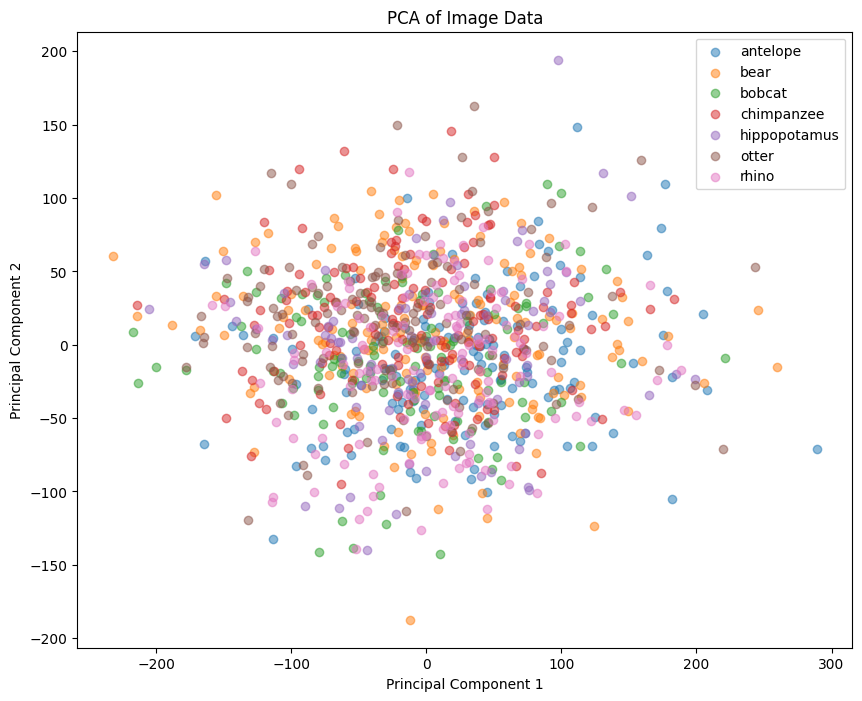

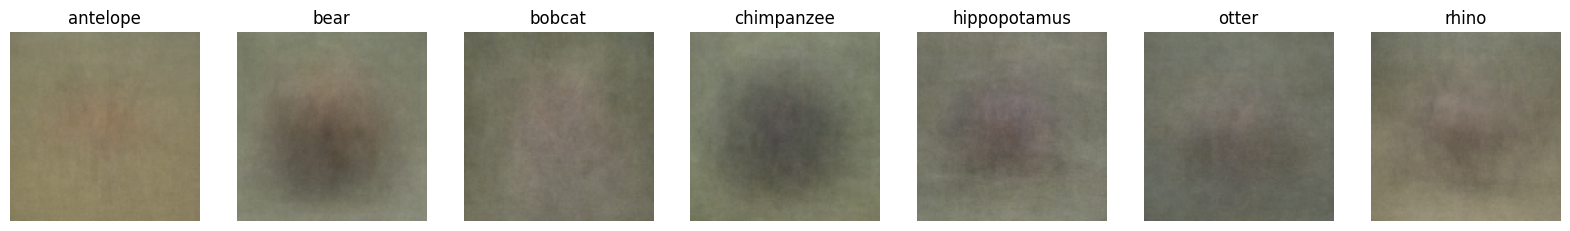

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def load_images_from_folders(base_path):
    data = []
    labels = []
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    image_resized = cv2.resize(image, (100, 100))
                    image_flattened = image_resized.flatten()
                    data.append(image_flattened)
                    labels.append(folder_name)
    return np.array(data), np.array(labels)

def exploratory_analysis(data, labels):
    df = pd.DataFrame(data)
    df['label'] = labels

    print("Data shape:", data.shape)
    print("Labels shape:", labels.shape)
    print(df['label'].value_counts())

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)

    df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
    df_pca['label'] = labels

    plt.figure(figsize=(10, 8))
    for label in np.unique(labels):
        subset = df_pca[df_pca['label'] == label]
        plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Image Data')
    plt.legend()
    plt.show()

    mean_images = {}
    for label in np.unique(labels):
        subset = data[labels == label]
        mean_image = np.mean(subset, axis=0)
        mean_images[label] = mean_image.reshape(100, 100, 3)

    fig, axs = plt.subplots(1, len(mean_images), figsize=(20, 5))
    for ax, (label, mean_image) in zip(axs, mean_images.items()):
        ax.imshow(cv2.cvtColor(mean_image.astype('uint8'), cv2.COLOR_BGR2RGB))
        ax.set_title(label)
        ax.axis('off')
    plt.show()

base_path = '/content/drive/MyDrive/bndbox_image'

data, labels = load_images_from_folders(base_path)

exploratory_analysis(data, labels)


Dentre estes animais, os bovinos são os anítlopes, totalizando 152 imagens

Data shape: (152, 30000)
Labels shape: (152,)
label
antelope    152
Name: count, dtype: int64


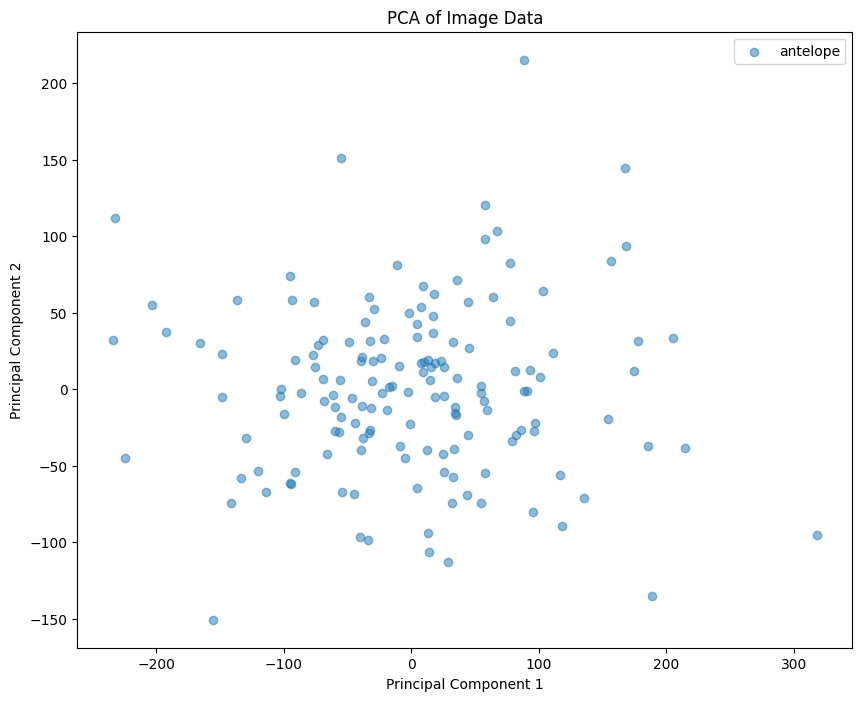

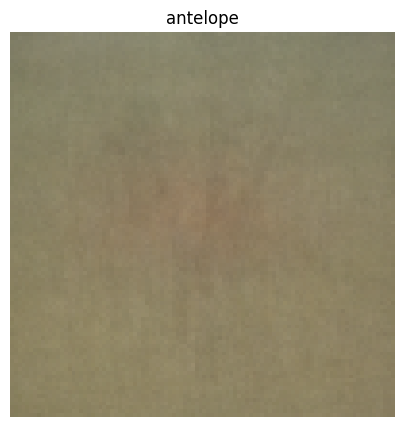

In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to load images and extract basic features
def load_images_from_folders(base_path, filter_label=None):
    data = []
    labels = []
    for folder_name in os.listdir(base_path):
        if filter_label and folder_name != filter_label:
            continue
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    # Resize image to a fixed size (e.g., 100x100)
                    image_resized = cv2.resize(image, (100, 100))
                    image_flattened = image_resized.flatten()
                    data.append(image_flattened)
                    labels.append(folder_name)
    return np.array(data), np.array(labels)

# Function to perform exploratory analysis
def exploratory_analysis(data, labels):
    df = pd.DataFrame(data)
    df['label'] = labels

    # Display basic information
    print("Data shape:", data.shape)
    print("Labels shape:", labels.shape)
    print(df['label'].value_counts())

    # PCA for dimensionality reduction
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)

    df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
    df_pca['label'] = labels

    # Plotting the PCA result
    plt.figure(figsize=(10, 8))
    for label in np.unique(labels):
        subset = df_pca[df_pca['label'] == label]
        plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Image Data')
    plt.legend()
    plt.show()

    # Mean image per class
    mean_images = {}
    for label in np.unique(labels):
        subset = data[labels == label]
        mean_image = np.mean(subset, axis=0)
        mean_images[label] = mean_image.reshape(100, 100, 3)

    # Display mean images
    fig, axs = plt.subplots(1, len(mean_images), figsize=(20, 5))
    if len(mean_images) == 1:
        axs = [axs]  # Convert to list for iteration
    for ax, (label, mean_image) in zip(axs, mean_images.items()):
        ax.imshow(cv2.cvtColor(mean_image.astype('uint8'), cv2.COLOR_BGR2RGB))
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Path to the base directory containing the folders of images
base_path = '/content/drive/MyDrive/bndbox_image'

# Load only antelope images
data, labels = load_images_from_folders(base_path, filter_label='antelope')

# Perform exploratory analysis
exploratory_analysis(data, labels)
